In [1]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 47 (delta 16), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [2]:
ls

Mecab-ko-for-Google-Colab/  sample_data/


In [3]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [4]:
ls

images/  install_mecab-ko_on_colab190912.sh  README.md


In [5]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 120kB/s 
     |████████████████████████████████| 92kB 14.5MB/s 
     |████████████████████████████████| 491kB 58.0MB/s 
  Created wheel for JPype1: filename=JPype1-0.7.1-cp36-cp36m-linux_x86_64.whl size=2445630 sha256=c90c42a617bd27eaebd738f7155524ef065c51956ca902583334f8536a5022b0
  Stored in directory: /root/.cache/pip/wheels/b0/49/6a/4393ef8542c00becf80691bd242693db9e263d6e499323a984
Successfully built JPype1
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2019-12-19 00:39:08--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket

In [6]:
import os, sys 
from google.colab import drive 
drive.mount('/content/mnt') 
nb_path = '/content/notebooks' 
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path) 
sys.path.insert(0, nb_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/mnt


In [7]:
cd /content/mnt/My Drive/Colab Notebooks

/content/mnt/My Drive/Colab Notebooks


In [0]:
import pandas as pd
train_data = pd.read_csv("model_kb_dacon02_trainset.csv")
test_data = pd.read_csv("public_test.csv")

In [0]:
test_data_text = list(test_data['text'])

test_clear_text = []

for i in range(len(test_data_text)):
  test_clear_text.append(test_data_text[i].replace('XXX', ''))
test_data['clear_text'] = test_clear_text

In [10]:
import re

test_clear_text = list(test_data['clear_text'])

test_clear_text2 = []

for text in test_clear_text:
  temp = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', text)
  test_clear_text2.append(temp)
test_data['clear_text2'] = test_clear_text2
test_data

,id,year_month,text,clear_text,clear_text2
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...,고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난주 글...,고객님 안녕하세요 새롭게 시작하는 한 주 행복 가득하시길 기원합니다 지난주 글로벌 ...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...,긴급 안내 은행 가락동 지점 - 헬리오 기본 대출이자를 조합에서 납부...,긴급 안내 은행 가락동 지점 헬리오 기본 대출이자를 조합에서 납부했...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같든데 ...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다엊그제 새해가 시작된거같든데 벌...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...,고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다. 기...,고객님찾아온 행운을 잡으셨나요 못잡으셨다면 이번에 다시 잡으시길 기원합니다 기쁜날...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다. 고객님의 소중...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다 고객님의 소중한...
...,...,...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...,(광고) 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점...,광고 고객님안녕하십니까고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점 계장...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...,(광고)알림 신청하면 매일 현금 100만원! 부동산 리브온지금 부동산 리브온 App...,광고알림 신청하면 매일 현금 100만원 부동산 리브온지금 부동산 리브온 App에서 ...


In [11]:
train_data

,Unnamed: 0,id,year_month,text,smishing,len,clear_text,len2,clear_text2
0,0,10,2017-01,(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준...,1,917,(광고)Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다.당행상품의 자...,878,광고Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다당행상품의 자격기준...
1,1,23,2017-01,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,0,749,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,743,시장동향0130 마감 기준KOSPI 208359pt081126 마감 기준 KOSPI...
2,2,26,2017-01,(광고)XXX추가 XXX품 특판 안내문XXX 지점에서 취급하고 있는 여신 XXX...,1,399,(광고)추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영...,363,광고추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영업부...
3,3,36,2017-01,(광고)XXX신용관리 XXX 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가...,1,941,(광고)신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주...,914,광고신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주지 ...
4,4,45,2017-01,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,1,937,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,904,광고안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA 수신...
...,...,...,...,...,...,...,...,...,...
37401,37401,336362,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1,1034,(광고)금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내고 있...,1013,광고금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 이자를 내고 있는 분2월...
37402,37402,336366,2018-12,(광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...,1,911,(광고)나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부득이하...,893,광고나의 한도금리를 알아보자금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 ...
37403,37403,336369,2018-12,(광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...,1,474,(광고) 항상 (국민)은행을 이용해주셔서 감사합니다. 2018년 12월 신상품이 출...,444,광고 항상 국민은행을 이용해주셔서 감사합니다 2018년 12월 신상품이 출시되여서 ...
37404,37404,336370,2018-12,(광고)XXX가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준...,1,826,(광고)가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완...,814,광고가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완화되...


In [12]:
from konlpy.tag import Okt
from konlpy.tag import Mecab
okt = Okt()
mecab = Mecab()

/content/notebooks/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [0]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [15]:
from tqdm import tqdm
X_train = []
for i in tqdm(range(len(train_data['clear_text2']))):
  temp_X = []
  temp_X = okt.nouns(train_data['clear_text2'].iloc[i]) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_train.append(temp_X)

100%|██████████| 37406/37406 [28:39<00:00, 19.02it/s]


In [16]:
X_test = []
for i in tqdm(range(len(test_data['clear_text2']))):
  temp_X = []
  temp_X = okt.nouns(test_data['clear_text2'].iloc[i]) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_test.append(temp_X)

100%|██████████| 1626/1626 [00:34<00:00, 47.73it/s]


In [17]:
print(X_train[:3])

[['광고', '고객', '마음가짐', '준비', '상품', '자격', '기준', '심사', '기준', '완화', '상품', '대해', '상품', '정보', '전달', '수신', '희망', '경우', '거부', '답장', '주시', '수신', '거부', '목록', '등록', '다시', '발송', '조치', '신청', '방법', '터치', '문자', '상담', '상담', '답장', '전화', '주시', '상담', '도움', '카카오', '상담', '서비스', '시행', '친구', '추가', '상담', '신청', '시중', '은행권', '기존', '한도', '모두', '사용', '대출', '원리금', '균등', '방식', '불입', '금액', '채무', '금액', '관리', '고객', '금리', '때문', '대출', '고객', '파트너', '로서', '상품', '특징', '거래', '진행', '가능', '시중', '은행권', '한도', '자체', '등급', '판단', '신용', '진행', '가능', '부채', '부채', '통합', '상품', '전환', '가능', '원리금', '균등', '방식', '이자', '입하', '만기일', '시로', '전환', '가능', '가상', '조회', '통해', '한도', '금리', '확인가능', '상품', '안내', '직장인', '전용', '신용', '상품', '한도', '최대', '금리', '최저', '자격', '은행', '자체', '등급', '기업', '리스트', '차등', '적용', '채무', '통합', '전환', '상품', '한도', '연봉', '대비', '금리', '최저', '자격', '은행', '자체', '등급', '기업', '리스트', '차등', '적용', '희망', '홀씨', '한도', '최대', '금리', '자격', '연봉', '이하', '고객', '대상', '자체', '등급', '광고'], ['시장', '동향', '마감', '기준', '마감', '기준', '마감', '기준', '상하이', '종합', '마감', '기

In [18]:
print(X_test[:3])

[['고객', '시작', '행복', '기원', '지난주', '글로벌', '증시', '파월', '의장', '통화정책', '대해', '완화', '태도', '변화', '주초', '투자', '심리', '개선', '상승', '마감', '차관', '무역', '협상', '진행', '점도', '긍정', '달러', '환율', '주간', '하락', '가운데', '외국인', '투자자', '국내', '증시', '매수', '규모', '상회', '수급', '개선', '점도', '주목', '필요', '금주', '시장', '미국', '금융', '실적', '발표', '시작', '본격', '실적', '시즌', '진입', '지난주', '애플', '삼성', '전자', '기업', '실적', '전망', '하향', '조정', '참고', '올해', '글로벌', '성장', '둔화', '조속', '기업', '감소', '추이', '관심', '필요', '후반', '브렉', '시트', '영국', '하원', '표결', '예정', '날씨', '건강', '유의', '한주', '은행', '송도', '센터'], ['긴급', '안내', '은행', '가락동', '지점', '헬리', '기본', '대출', '이자', '조합', '납부', '종료', '따라서', '매월', '중도', '대출', '이자', '계약', '직접', '납부', '방법', '안내', '자동', '이체', '등록', '은행', '영업', '본인', '방문', '신분증', '직원', '대출', '계좌', '대출', '이자', '자동', '납부', '계좌', '자동', '이체', '등록', '요청', '인터넷', '뱅킹', '공인', '인증서', '로그인', '자동', '이체', '등록', '자동', '이체', '미등록', '고객', '은행', '영업', '방문', '대출', '이자', '납부', '대출', '이자', '매월', '납부', '사항', '자동', '이체', '등록', '권장', '매월', '대출', '이자', '미납', '대출', '부분', '대

In [19]:
from keras.preprocessing.text import Tokenizer
max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

Using TensorFlow backend.


In [20]:
print(X_train[:3])

[[11, 6, 2173, 396, 1, 43, 81, 226, 81, 216, 1, 93, 1, 106, 344, 41, 73, 38, 10, 57, 18, 41, 10, 281, 121, 171, 99, 142, 9, 26, 528, 17, 5, 5, 57, 30, 18, 5, 52, 248, 5, 40, 194, 157, 24, 5, 9, 110, 68, 86, 8, 120, 35, 2, 50, 55, 32, 383, 33, 48, 33, 42, 6, 3, 219, 2, 6, 977, 1138, 1, 126, 76, 14, 7, 110, 68, 8, 58, 21, 90, 20, 14, 7, 15, 15, 12, 1, 27, 7, 50, 55, 32, 34, 326, 137, 238, 27, 7, 117, 69, 136, 8, 3, 315, 1, 25, 16, 405, 20, 1, 8, 29, 3, 53, 43, 4, 58, 21, 100, 135, 51, 37, 48, 12, 27, 1, 8, 88, 63, 3, 53, 43, 4, 58, 21, 100, 135, 51, 37, 73, 160, 8, 29, 3, 43, 88, 143, 6, 56, 58, 21, 11], [193, 1139, 189, 81, 189, 81, 189, 81, 1211, 115, 189, 81, 386, 1173, 189, 81, 386, 144, 189, 81, 472, 317, 317, 109, 79, 231, 1444, 471, 109, 812, 186, 369, 955, 419, 539, 60, 1410, 189, 711, 690, 4258, 280, 565, 471, 109, 1140, 763, 690, 2339, 4258, 280, 91, 4420, 1460, 1035, 1140, 616, 63, 125, 189, 1237, 565, 1031, 406, 955, 401, 231, 417, 429, 227, 578, 109, 231, 690, 4258, 280, 131

In [21]:
print(X_test[:3])

[[6, 309, 263, 337, 1099, 471, 109, 1495, 1284, 1080, 93, 216, 2851, 1143, 6584, 186, 369, 429, 60, 189, 8225, 296, 826, 14, 2046, 835, 472, 353, 1285, 125, 671, 419, 1035, 317, 109, 539, 982, 1392, 546, 429, 2046, 1201, 254, 1074, 193, 231, 13, 235, 565, 309, 882, 235, 979, 656, 1099, 1277, 1120, 867, 100, 235, 501, 1383, 420, 374, 270, 471, 1171, 468, 3597, 100, 122, 611, 107, 254, 1465, 1381, 1372, 1060, 1323, 2432, 550, 482, 145, 206, 975, 4, 1612, 130], [2648, 25, 4, 3572, 44, 5335, 306, 2, 34, 4325, 167, 947, 483, 169, 310, 2, 34, 697, 217, 167, 26, 25, 333, 489, 121, 4, 200, 261, 184, 651, 111, 2, 103, 2, 34, 333, 167, 103, 333, 489, 121, 1166, 199, 159, 479, 575, 707, 333, 489, 121, 333, 489, 3332, 6, 4, 200, 184, 2, 34, 167, 2, 34, 169, 167, 325, 333, 489, 121, 6518, 169, 2, 34, 1822, 2, 505, 1324, 95, 34, 20, 1432, 1799, 146, 1678, 206, 127, 2, 460, 6, 158, 325, 333, 9756, 121, 6, 158, 325], [6, 270, 1600, 1104, 680, 8134, 833, 1145, 112, 314, 1145, 456, 54, 4]]


In [0]:
import pickle

with open('tokenizer_okt_nouns.pickle', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

문자의 최대 길이 : 266
문자의 평균 길이 :  111.97278511468748


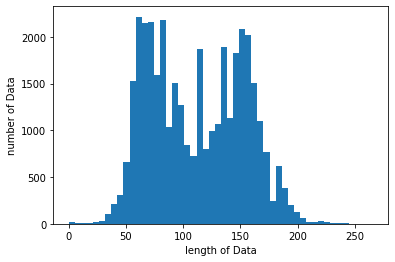

In [23]:
import matplotlib.pyplot as plt

print("문자의 최대 길이 :" , max(len(l) for l in X_train))
print("문자의 평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

문자의 최대 길이 :  224
문자의 평균 길이 :  49.07564575645756


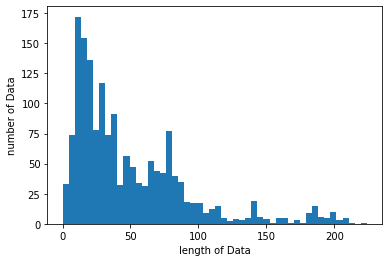

In [24]:
print("문자의 최대 길이 : ", max(len(l) for l in X_test))
print("문자의 평균 길이 : ", sum(map(len, X_test))/ len(X_test))
plt.hist([len(s) for s in X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [0]:
from keras.utils import np_utils
import numpy as np

y_train = []

for i in range(len(train_data['smishing'])):
  if train_data['smishing'].iloc[i] == 1:
    y_train.append([0, 1])
  elif train_data['smishing'].iloc[i] == 0:
    y_train.append([1, 0])

y_train = np.array(y_train)

In [0]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [0]:
max_len = 266 # 전체 데이터의 길이를 380로 맞춘다

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [0]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [30]:
model3 = Sequential()
model3.add(Embedding(max_words, 100))
model3.add(LSTM(128))
model3.add(Dense(2, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 33665 samples, validate on 3741 samples
Epoch 1/2





33665/33665 [==============================] - 447s 13ms/step - loss: 0.0331 - acc: 0.9931 - val_loss: 0.0636 - val_acc: 0.9861
Epoch 2/2
33665/33665 [==============================] - 442s 13ms/step - loss: 0.0160 - acc: 0.9959 - val_loss: 0.0112 - val_acc: 0.9965


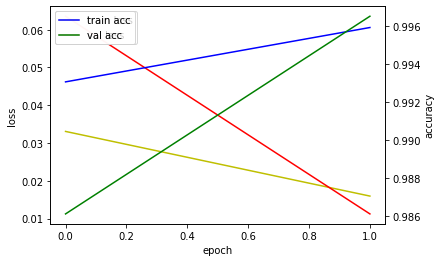

In [31]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history3.history['loss'], 'y', label='train loss')
loss_ax.plot(history3.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history3.history['acc'], 'b', label='train acc')
acc_ax.plot(history3.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
model3.save("model_kb_dacon_16_1.h5")

In [33]:
mypredict = model3.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_16_1.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_16_1.csv")

,id,smishing
0,340000,0.000146
1,340001,0.000678
2,340002,0.000280
3,340003,0.000153
4,340004,0.000108
...,...,...
1621,341621,0.000397
1622,341622,0.000259
1623,341623,0.000125
1624,341624,0.000512


In [34]:
model4 = Sequential()
model4.add(Embedding(max_words, 100))
model4.add(LSTM(128))
model4.add(Dense(2, activation='sigmoid'))

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/3
33665/33665 [==============================] - 440s 13ms/step - loss: 0.0348 - acc: 0.9914 - val_loss: 0.0149 - val_acc: 0.9965
Epoch 2/3
33665/33665 [==============================] - 443s 13ms/step - loss: 0.0127 - acc: 0.9976 - val_loss: 0.0294 - val_acc: 0.9912
Epoch 3/3
33665/33665 [==============================] - 445s 13ms/step - loss: 0.0040 - acc: 0.9991 - val_loss: 0.0293 - val_acc: 0.9957


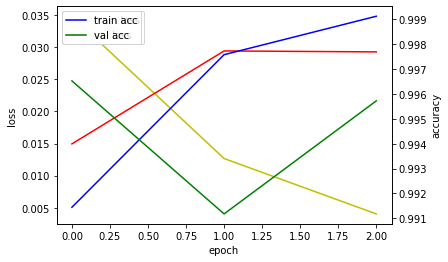

In [35]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history4.history['loss'], 'y', label='train loss')
loss_ax.plot(history4.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history4.history['acc'], 'b', label='train acc')
acc_ax.plot(history4.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
model4.save("model_kb_dacon_16_3.h5")

In [37]:
mypredict = model4.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_16_3.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_16_3.csv")

,id,smishing
0,340000,0.000072
1,340001,0.000381
2,340002,0.000135
3,340003,0.000088
4,340004,0.000089
...,...,...
1621,341621,0.000131
1622,341622,0.000066
1623,341623,0.000062
1624,341624,0.000243


In [38]:
model5 = Sequential()
model5.add(Embedding(max_words, 100))
model5.add(LSTM(128))
model5.add(Dense(2, activation='sigmoid'))

model5.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])
history5 = model5.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/2
33665/33665 [==============================] - 453s 13ms/step - loss: 0.0269 - acc: 0.9923 - val_loss: 0.0096 - val_acc: 0.9975
Epoch 2/2
33665/33665 [==============================] - 466s 14ms/step - loss: 0.0016 - acc: 0.9997 - val_loss: 0.0065 - val_acc: 0.9965


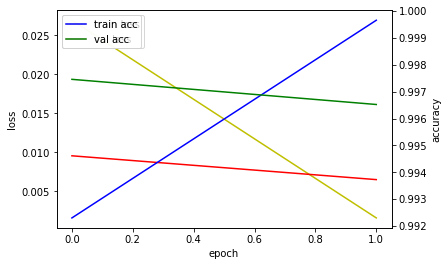

In [39]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history5.history['loss'], 'y', label='train loss')
loss_ax.plot(history5.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history5.history['acc'], 'b', label='train acc')
acc_ax.plot(history5.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [40]:
mypredict = model5.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_16_5.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_16_5.csv")

,id,smishing
0,340000,0.000097
1,340001,0.057382
2,340002,0.000564
3,340003,0.000290
4,340004,0.000288
...,...,...
1621,341621,0.000190
1622,341622,0.000420
1623,341623,0.000405
1624,341624,0.000079


In [41]:
model6 = Sequential()
model6.add(Embedding(max_words, 100))
model6.add(LSTM(128))
model6.add(Dense(2, activation='sigmoid'))

model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history6 = model6.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/2
33665/33665 [==============================] - 312s 9ms/step - loss: 0.0490 - acc: 0.9883 - val_loss: 0.0127 - val_acc: 0.9971
Epoch 2/2
33665/33665 [==============================] - 317s 9ms/step - loss: 0.0037 - acc: 0.9994 - val_loss: 0.0113 - val_acc: 0.9971


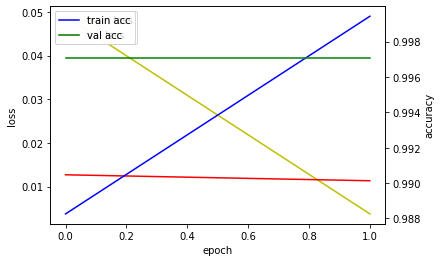

In [42]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history6.history['loss'], 'y', label='train loss')
loss_ax.plot(history6.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history6.history['acc'], 'b', label='train acc')
acc_ax.plot(history6.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [43]:
mypredict = model6.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_16_7.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_16_7.csv")

,id,smishing
0,340000,0.000153
1,340001,0.012519
2,340002,0.000556
3,340003,0.000299
4,340004,0.000148
...,...,...
1621,341621,0.000178
1622,341622,0.000383
1623,341623,0.000270
1624,341624,0.000138


In [0]:
model7 = Sequential()
model7.add(Embedding(max_words, 100))
model7.add(LSTM(128))
model7.add(Dense(2, activation='sigmoid'))

model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history7 = model7.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/3
33665/33665 [==============================] - 402s 12ms/step - loss: 0.0707 - acc: 0.9894 - val_loss: 0.0094 - val_acc: 0.9984
Epoch 2/3
33665/33665 [==============================] - 400s 12ms/step - loss: 0.0027 - acc: 0.9995 - val_loss: 0.0031 - val_acc: 0.9995
Epoch 3/3
33665/33665 [==============================] - 398s 12ms/step - loss: 6.2703e-04 - acc: 0.9999 - val_loss: 0.0015 - val_acc: 0.9997


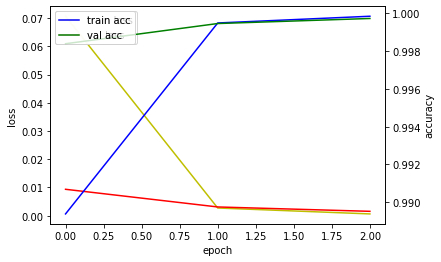

In [0]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history7.history['loss'], 'y', label='train loss')
loss_ax.plot(history7.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history7.history['acc'], 'b', label='train acc')
acc_ax.plot(history7.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
mypredict = model7.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_15.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_15.csv")

,id,smishing
0,340000,0.000050
1,340001,0.008809
2,340002,0.001054
3,340003,0.000698
4,340004,0.000033
...,...,...
1621,341621,0.000114
1622,341622,0.000204
1623,341623,0.000124
1624,341624,0.000088


In [44]:
from tqdm import tqdm
X_train2 = []
for i in tqdm(range(len(train_data['clear_text2']))):
  temp_X = []
  temp_X = okt.morphs(train_data['clear_text2'].iloc[i], stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_train2.append(temp_X)

100%|██████████| 37406/37406 [28:39<00:00, 19.33it/s]


In [45]:
X_test2 = []
for i in tqdm(range(len(test_data['clear_text2']))):
  temp_X = []
  temp_X = okt.morphs(test_data['clear_text2'].iloc[i], stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_test2.append(temp_X)

100%|██████████| 1626/1626 [00:34<00:00, 47.45it/s]


In [46]:
okt_morphs = []

for words in X_train2:
  for word in words:
    okt_morphs.append(word)

okt_words = list(set(list(okt_morphs)))

len(okt_words)

36070

In [0]:
from keras.preprocessing.text import Tokenizer
max_words = 36070
tokenizer2 = Tokenizer(num_words = max_words)
tokenizer2.fit_on_texts(X_train2)
X_train2 = tokenizer2.texts_to_sequences(X_train2)
X_test2 = tokenizer2.texts_to_sequences(X_test2)

문자의 최대 길이 : 315
문자의 평균 길이 :  163.6748917285997


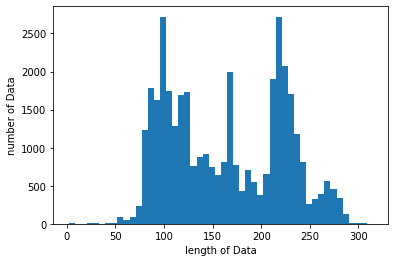

In [48]:
import matplotlib.pyplot as plt

print("문자의 최대 길이 :" , max(len(l) for l in X_train2))
print("문자의 평균 길이 : ", sum(map(len, X_train2))/ len(X_train2))
plt.hist([len(s) for s in X_train2], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

문자의 최대 길이 :  287
문자의 평균 길이 :  69.95264452644527


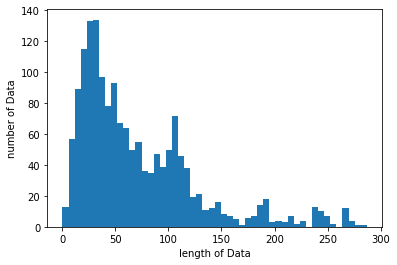

In [49]:
print("문자의 최대 길이 : ", max(len(l) for l in X_test2))
print("문자의 평균 길이 : ", sum(map(len, X_test2))/ len(X_test2))
plt.hist([len(s) for s in X_test2], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [0]:
from keras.utils import np_utils
import numpy as np

y_train2 = []

for i in range(len(train_data['smishing'])):
  if train_data['smishing'].iloc[i] == 1:
    y_train2.append([0, 1])
  elif train_data['smishing'].iloc[i] == 0:
    y_train2.append([1, 0])

y_train2 = np.array(y_train2)

In [0]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [0]:
max_len = 315 # 전체 데이터의 길이를 380로 맞춘다

X_train2 = pad_sequences(X_train2, maxlen=max_len)
X_test2 = pad_sequences(X_test2, maxlen=max_len)

In [0]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [54]:
model10 = Sequential()
model10.add(Embedding(max_words, 100))
model10.add(LSTM(128))
model10.add(Dense(2, activation='sigmoid'))

model10.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history10 = model10.fit(X_train2, y_train2, epochs=2, batch_size=32, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/2
33665/33665 [==============================] - 519s 15ms/step - loss: 0.0394 - acc: 0.9886 - val_loss: 0.0124 - val_acc: 0.9971
Epoch 2/2
33665/33665 [==============================] - 514s 15ms/step - loss: 0.0021 - acc: 0.9993 - val_loss: 0.0075 - val_acc: 0.9975


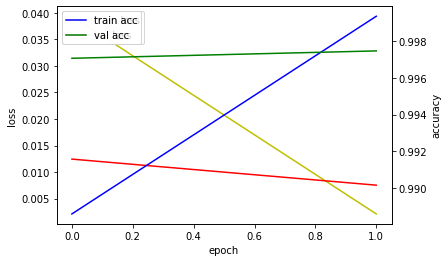

In [55]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history10.history['loss'], 'y', label='train loss')
loss_ax.plot(history10.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history10.history['acc'], 'b', label='train acc')
acc_ax.plot(history10.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [56]:
mypredict = model10.predict(X_test2)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_17_2.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_17_2.csv")

,id,smishing
0,340000,0.005730
1,340001,0.000165
2,340002,0.006769
3,340003,0.015419
4,340004,0.997755
...,...,...
1621,341621,0.019590
1622,341622,0.008873
1623,341623,0.096163
1624,341624,0.999835


In [57]:
model11 = Sequential()
model11.add(Embedding(max_words, 100))
model11.add(LSTM(128))
model11.add(Dense(2, activation='sigmoid'))

model11.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history11 = model11.fit(X_train2, y_train2, epochs=1, batch_size=32, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/1
33665/33665 [==============================] - 518s 15ms/step - loss: 0.0289 - acc: 0.9933 - val_loss: 0.0142 - val_acc: 0.9965


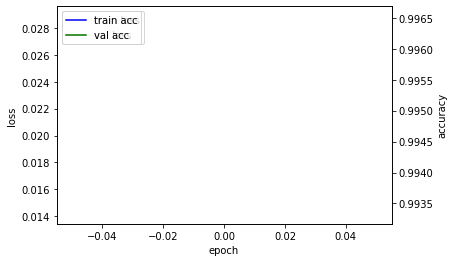

In [58]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history11.history['loss'], 'y', label='train loss')
loss_ax.plot(history11.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history11.history['acc'], 'b', label='train acc')
acc_ax.plot(history11.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [59]:
mypredict = model11.predict(X_test2)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_17_5.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_17_5.csv")

,id,smishing
0,340000,0.029575
1,340001,0.001856
2,340002,0.419242
3,340003,0.329168
4,340004,0.760362
...,...,...
1621,341621,0.005297
1622,341622,0.190671
1623,341623,0.384214
1624,341624,0.952244


In [60]:
from tqdm import tqdm
X_train3 = []
for i in tqdm(range(len(train_data['clear_text2']))):
  temp_X = []
  temp_X = okt.morphs(train_data['clear_text2'].iloc[i], stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_train3.append(temp_X)

100%|██████████| 37406/37406 [28:53<00:00, 18.19it/s]


In [61]:
X_test3 = []
for i in tqdm(range(len(test_data['clear_text2']))):
  temp_X = []
  temp_X = okt.morphs(test_data['clear_text2'].iloc[i], stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_test3.append(temp_X)

100%|██████████| 1626/1626 [00:35<00:00, 45.58it/s]


In [0]:
from keras.preprocessing.text import Tokenizer
max_words = 35000
tokenizer3 = Tokenizer(num_words = max_words)
tokenizer3.fit_on_texts(X_train3)
X_train3 = tokenizer3.texts_to_sequences(X_train3)
X_test3 = tokenizer3.texts_to_sequences(X_test3)

문자의 최대 길이 : 315
문자의 평균 길이 :  163.654841469283


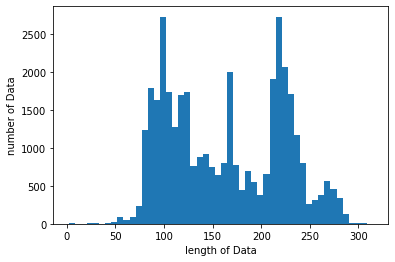

In [63]:
import matplotlib.pyplot as plt

print("문자의 최대 길이 :" , max(len(l) for l in X_train3))
print("문자의 평균 길이 : ", sum(map(len, X_train3))/ len(X_train3))
plt.hist([len(s) for s in X_train3], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

문자의 최대 길이 :  287
문자의 평균 길이 :  69.92250922509226


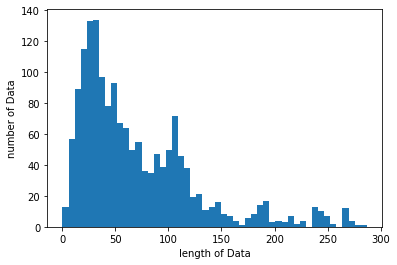

In [64]:
print("문자의 최대 길이 : ", max(len(l) for l in X_test3))
print("문자의 평균 길이 : ", sum(map(len, X_test3))/ len(X_test3))
plt.hist([len(s) for s in X_test3], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [0]:
from keras.utils import np_utils
import numpy as np

y_train3 = []

for i in range(len(train_data['smishing'])):
  if train_data['smishing'].iloc[i] == 1:
    y_train3.append([0, 1])
  elif train_data['smishing'].iloc[i] == 0:
    y_train3.append([1, 0])

y_train3 = np.array(y_train3)

In [0]:
from keras.layers import Embedding, Dense, LSTM, Dropout, Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [0]:
max_len = 315 # 전체 데이터의 길이를 380로 맞춘다

X_train3 = pad_sequences(X_train3, maxlen=max_len)
X_test3 = pad_sequences(X_test3, maxlen=max_len)

In [69]:
model14 = Sequential()
model14.add(Embedding(max_words, 128, input_length=max_len))
model14.add(Dropout(0.2))
model14.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model14.add(GlobalMaxPooling1D())
model14.add(Dense(128, activation='relu'))
model14.add(Dropout(0.2))
model14.add(Dense(2, activation='sigmoid'))
model14.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history14 = model14.fit(X_train3, y_train3, epochs=2, batch_size=32, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/2
33665/33665 [==============================] - 244s 7ms/step - loss: 0.0231 - acc: 0.9917 - val_loss: 0.0045 - val_acc: 0.9976
Epoch 2/2
33665/33665 [==============================] - 226s 7ms/step - loss: 2.8256e-04 - acc: 0.9999 - val_loss: 0.0056 - val_acc: 0.9980


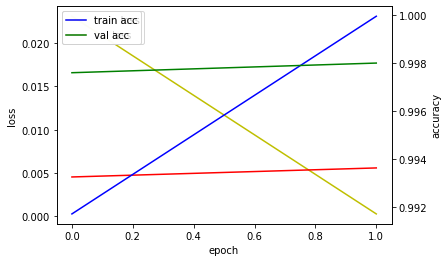

In [70]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history14.history['loss'], 'y', label='train loss')
loss_ax.plot(history14.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history14.history['acc'], 'b', label='train acc')
acc_ax.plot(history14.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [71]:
mypredict = model14.predict(X_test3)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_17_11.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_17_11.csv")

,id,smishing
0,340000,0.000005
1,340001,0.000195
2,340002,0.000012
3,340003,0.000009
4,340004,0.000005
...,...,...
1621,341621,0.000019
1622,341622,0.000017
1623,341623,0.000001
1624,341624,0.000005


In [72]:
pd.read_csv("kb_submission_14.csv")

,id,smishing
0,340000,0.000013
1,340001,0.000363
2,340002,0.000008
3,340003,0.000015
4,340004,0.000007
...,...,...
1621,341621,0.000052
1622,341622,0.000012
1623,341623,0.000004
1624,341624,0.000052


In [75]:
model15 = Sequential()
model15.add(Embedding(max_words, 128, input_length=max_len))
model15.add(Dropout(0.2))
model15.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model15.add(MaxPooling1D(pool_size=4))
model15.add(LSTM(128))
model15.add(Dense(2, activation='sigmoid'))
model15.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history15 = model15.fit(X_train3, y_train3, epochs=2, batch_size=32, validation_split=0.1)


Train on 33665 samples, validate on 3741 samples
Epoch 1/2
33665/33665 [==============================] - 386s 11ms/step - loss: 0.0182 - acc: 0.9952 - val_loss: 0.0088 - val_acc: 0.9971
Epoch 2/2
33665/33665 [==============================] - 381s 11ms/step - loss: 5.2514e-04 - acc: 0.9999 - val_loss: 0.0134 - val_acc: 0.9973


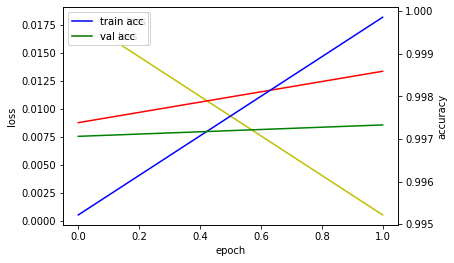

In [76]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history15.history['loss'], 'y', label='train loss')
loss_ax.plot(history15.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history15.history['acc'], 'b', label='train acc')
acc_ax.plot(history15.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [77]:
mypredict = model15.predict(X_test3)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_18_3.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_18_3.csv")

,id,smishing
0,340000,0.000011
1,340001,0.026605
2,340002,0.000021
3,340003,0.000010
4,340004,0.000016
...,...,...
1621,341621,0.000007
1622,341622,0.000018
1623,341623,0.000009
1624,341624,0.000043
